In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction

## Dataset Overview

This dataset contains information about clients who have taken out payday loans. The dataset includes various attributes related to the clients' demographics, financial status, and loan details. Each record in the dataset represents a unique loan issued to a client, with accompanying information that can help assess the likelihood of the client defaulting on the loan.

## Primary Goal

The primary objective of this project is to build a predictive model that can accurately determine whether a client will default on their payday loan. This is a binary classification problem where the target variable is the `default_status`, indicating whether the client has defaulted (1) or not (0). By analyzing the features in the dataset, we aim to develop a model that can predict the likelihood of default, thereby assisting lenders in making more informed decisions.


## 1. Dataset Description

In [1]:
# import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


pd.set_option("display.max_columns", None)

## Dataset Columns and Definitions

- **client_id**: Unique identifier for each client.
- **gender**: Gender of the client (e.g., Male, Female).
- **age**: Age of the client.
- **education_level**: Client's level of education (e.g., High School, Bachelor's).
- **owns_car**: Indicates whether the client owns a car (1 for Yes, 0 for No).
- **car_category**: Category of the car owned by the client (e.g., economy, luxury).
- **housing_status**: Category of housing status (e.g., rent, own).
- **job_prestige**: Prestige category of the client's job.
- **stable_employment**: Indicates whether the client has stable employment (1 for Yes, 0 for No).
- **annual_income**: Client's annual income.
- **travel_history**: Indicates whether the client has a foreign passport and travel history.
- **declined_applications**: Number of previously declined loan applications.
- **credit_score**: Client's credit score based on bureau data.
- **credit_inquiries**: Number of credit inquiries made by credit bureaus.
- **branch_category**: Category of the branch based on channel and location.
- **social_networking**: Client's connections with other bank clients.
- **info_update_recency**: Recency of information update by the client.
- **application_date**: Date when the loan application was submitted (in datetime format with Eastern Time Zone).
- **default_status**: Indicates whether the client has defaulted on a loan (1 for Default, 0 for No Default).



In [2]:
# data loading
df = pd.read_csv("/kaggle/input/equifax-pdl-scoring-us-2023-csv/Equifax_pdl_US_2023.csv")
df.head()

,client_id,gender,age,education_level,owns_car,car_category,housing_status,job_prestige,stable_employment,annual_income,travel_history,declined_applications,credit_score,credit_inquiries,branch_category,social_networking,info_update_recency,application_date,default_status
0,20230103081016-7-128,F,29,GRD,0,0,1,1,1,22000,0,1,462,3,7,2,2,2023-01-03 08:10:16-05:00,0
1,20230103083026-6-62,F,47,UGR,1,0,2,1,0,24000,1,0,642,3,6,1,4,2023-01-03 08:30:26-05:00,0
2,20230103083401-5-110,M,47,SCH,0,0,1,2,0,22000,0,4,615,5,5,1,2,2023-01-03 08:34:01-05:00,0
3,20230103085539-6-114,F,26,GRD,0,0,2,1,0,27000,0,0,473,4,6,2,1,2023-01-03 08:55:39-05:00,0
4,20230103092311-5-102,M,45,SCH,0,0,1,1,0,20000,0,1,516,2,5,2,2,2023-01-03 09:23:11-05:00,0


In [3]:
df.shape

(73420, 19)

In [4]:
df.isna().sum()

client_id                0
gender                   0
age                      0
education_level          0
owns_car                 0
car_category             0
housing_status           0
job_prestige             0
stable_employment        0
annual_income            0
travel_history           0
declined_applications    0
credit_score             0
credit_inquiries         0
branch_category          0
social_networking        0
info_update_recency      0
application_date         0
default_status           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73420 entries, 0 to 73419
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   client_id              73420 non-null  object
 1   gender                 73420 non-null  object
 2   age                    73420 non-null  int64 
 3   education_level        73420 non-null  object
 4   owns_car               73420 non-null  int64 
 5   car_category           73420 non-null  int64 
 6   housing_status         73420 non-null  int64 
 7   job_prestige           73420 non-null  int64 
 8   stable_employment      73420 non-null  int64 
 9   annual_income          73420 non-null  int64 
 10  travel_history         73420 non-null  int64 
 11  declined_applications  73420 non-null  int64 
 12  credit_score           73420 non-null  int64 
 13  credit_inquiries       73420 non-null  int64 
 14  branch_category        73420 non-null  int64 
 15  social_networking  

In [6]:
df.duplicated().sum()

0

# EDA

## Univariate Analysis

gender
F    41369
M    32051
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

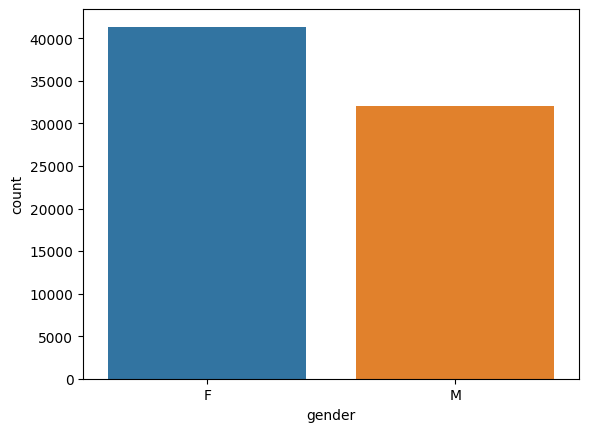

In [7]:
# distribution of gender
print(df['gender'].value_counts())
sns.countplot(data = df, x='gender')

0.47619175358180077
count    73420.000000
mean        39.265731
std         11.521321
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64


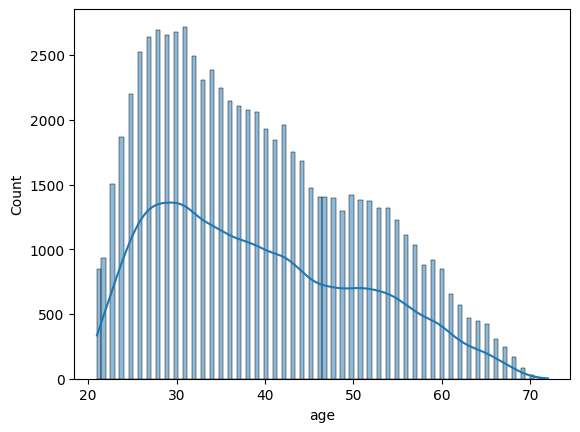

In [8]:
# distribution of age
print(df['age'].skew())
sns.histplot(df['age'], bins=100,kde=True)
print(df['age'].describe())

education_level
SCH    38843
GRD    23322
UGR     9809
PGR     1252
ACD      194
Name: count, dtype: int64


<Axes: xlabel='education_level', ylabel='count'>

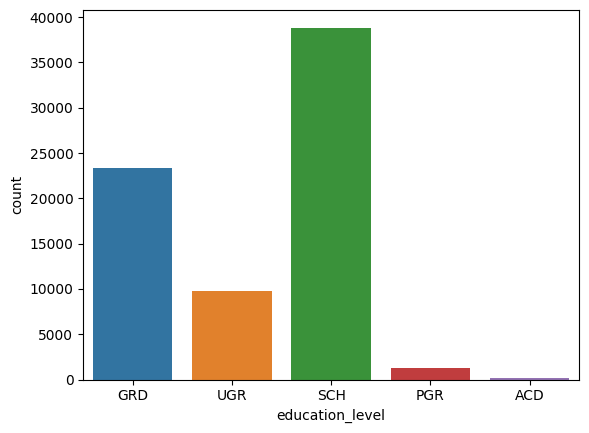

In [9]:
# distribution of education_level
print(df['education_level'].value_counts())
sns.countplot(data=df, x='education_level')

### Education Level Definitions

- **SCH (School)**
  - Refers to clients who have completed their schooling education, typically up to high school level.

- **GRD (Graduate)**
  - Refers to clients who have completed a bachelor's degree or higher.

- **UGR (Undergraduate)**
  - Refers to clients who are currently pursuing or have completed an undergraduate degree but have not yet graduated.

- **PGR (Postgraduate)**
  - Refers to clients who have completed a master's degree or other postgraduate qualifications.

- **ACD (Associate Degree)**
  - Refers to clients who have completed an associate degree, which is a level of education between high school and a bachelor's degree.


4.9888367617001395
count     73420.000000
mean      24932.933806
std        9900.160676
min       15000.000000
25%       20000.000000
50%       22000.000000
75%       27000.000000
max      222000.000000
Name: annual_income, dtype: float64


<Axes: xlabel='annual_income', ylabel='Count'>

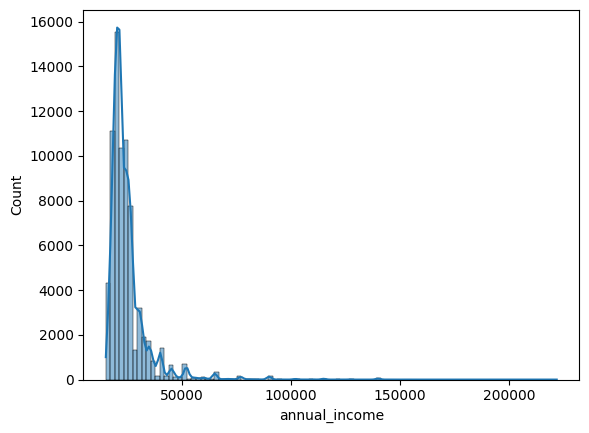

In [10]:
# distr of annual_income
print(df['annual_income'].skew())
print(df['annual_income'].describe())
sns.histplot(df['annual_income'],bins=100,kde=True)

-0.3989708515348832
count    73420.000000
mean       580.015486
std         90.882805
min        300.000000
25%        523.000000
50%        587.000000
75%        645.000000
max        850.000000
Name: credit_score, dtype: float64


<Axes: xlabel='credit_score', ylabel='Count'>

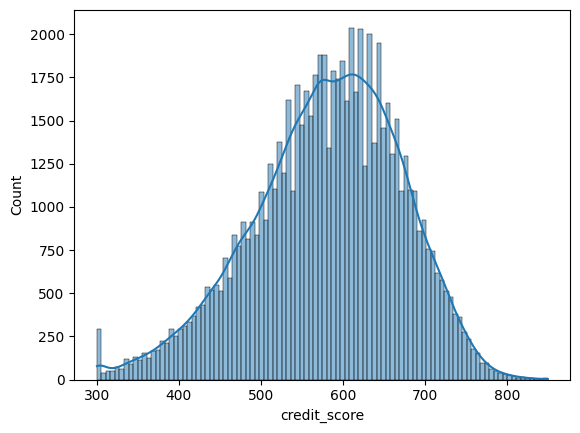

In [11]:
# distr of credit_score
print(df['credit_score'].skew())
print(df['credit_score'].describe())
sns.histplot(df['credit_score'],bins=100,kde=True)

### Preprocessing

In [12]:
# backup
df0 = df.copy()

In [16]:
df0.copy()

,client_id,gender,age,education_level,owns_car,car_category,housing_status,job_prestige,stable_employment,annual_income,travel_history,declined_applications,credit_score,credit_inquiries,branch_category,social_networking,info_update_recency,application_date,default_status
0,20230103081016-7-128,F,29,GRD,0,0,1,1,1,22000,0,1,462,3,7,2,2,2023-01-03 08:10:16-05:00,0
1,20230103083026-6-62,F,47,UGR,1,0,2,1,0,24000,1,0,642,3,6,1,4,2023-01-03 08:30:26-05:00,0
2,20230103083401-5-110,M,47,SCH,0,0,1,2,0,22000,0,4,615,5,5,1,2,2023-01-03 08:34:01-05:00,0
3,20230103085539-6-114,F,26,GRD,0,0,2,1,0,27000,0,0,473,4,6,2,1,2023-01-03 08:55:39-05:00,0
4,20230103092311-5-102,M,45,SCH,0,0,1,1,0,20000,0,1,516,2,5,2,2,2023-01-03 09:23:11-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73415,20230623165619-8-200,M,25,GRD,0,0,2,1,0,27000,0,0,474,3,8,1,3,2023-06-23 16:56:19-04:00,0
73416,20230623165656-8-185,F,46,SCH,0,0,2,1,1,20000,0,1,749,4,8,1,1,2023-06-23 16:56:56-04:00,0
73417,20230623165742-6-89,M,52,SCH,1,0,2,1,0,18000,1,0,565,3,6,1,3,2023-06-23 16:57:42-04:00,0
73418,20230623165751-6-70,M,24,UGR,0,0,2,1,1,21000,0,0,605,2,6,1,3,2023-06-23 16:57:51-04:00,0


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'gender' column
df0['gender_enc'] = label_encoder.fit_transform(df0['gender'])
df0.drop(columns='gender', axis=1,inplace=True)
df0.head()

,client_id,age,education_level,owns_car,car_category,housing_status,job_prestige,stable_employment,annual_income,travel_history,declined_applications,credit_score,credit_inquiries,branch_category,social_networking,info_update_recency,application_date,default_status,gender_enc
0,20230103081016-7-128,29,GRD,0,0,1,1,1,22000,0,1,462,3,7,2,2,2023-01-03 08:10:16-05:00,0,0
1,20230103083026-6-62,47,UGR,1,0,2,1,0,24000,1,0,642,3,6,1,4,2023-01-03 08:30:26-05:00,0,0
2,20230103083401-5-110,47,SCH,0,0,1,2,0,22000,0,4,615,5,5,1,2,2023-01-03 08:34:01-05:00,0,1
3,20230103085539-6-114,26,GRD,0,0,2,1,0,27000,0,0,473,4,6,2,1,2023-01-03 08:55:39-05:00,0,0
4,20230103092311-5-102,45,SCH,0,0,1,1,0,20000,0,1,516,2,5,2,2,2023-01-03 09:23:11-05:00,0,1


In [18]:
df0.drop(columns=["client_id","application_date"], axis=1, inplace=True)
df0.head()

,age,education_level,owns_car,car_category,housing_status,job_prestige,stable_employment,annual_income,travel_history,declined_applications,credit_score,credit_inquiries,branch_category,social_networking,info_update_recency,default_status,gender_enc
0,29,GRD,0,0,1,1,1,22000,0,1,462,3,7,2,2,0,0
1,47,UGR,1,0,2,1,0,24000,1,0,642,3,6,1,4,0,0
2,47,SCH,0,0,1,2,0,22000,0,4,615,5,5,1,2,0,1
3,26,GRD,0,0,2,1,0,27000,0,0,473,4,6,2,1,0,0
4,45,SCH,0,0,1,1,0,20000,0,1,516,2,5,2,2,0,1


In [19]:
df_encoded = (pd.get_dummies(df0, columns=['education_level'], drop_first=False))

,age,education_level,owns_car,car_category,housing_status,job_prestige,stable_employment,annual_income,travel_history,declined_applications,credit_score,credit_inquiries,branch_category,social_networking,info_update_recency,default_status,gender_enc
0,29,GRD,0,0,1,1,1,22000,0,1,462,3,7,2,2,0,0
1,47,UGR,1,0,2,1,0,24000,1,0,642,3,6,1,4,0,0
2,47,SCH,0,0,1,2,0,22000,0,4,615,5,5,1,2,0,1
3,26,GRD,0,0,2,1,0,27000,0,0,473,4,6,2,1,0,0
4,45,SCH,0,0,1,1,0,20000,0,1,516,2,5,2,2,0,1


In [21]:
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.name.startswith('education_level') else x)
df_encoded.head()

,age,owns_car,car_category,housing_status,job_prestige,stable_employment,annual_income,travel_history,declined_applications,credit_score,credit_inquiries,branch_category,social_networking,info_update_recency,default_status,gender_enc,education_level_ACD,education_level_GRD,education_level_PGR,education_level_SCH,education_level_UGR
0,29,0,0,1,1,1,22000,0,1,462,3,7,2,2,0,0,0,1,0,0,0
1,47,1,0,2,1,0,24000,1,0,642,3,6,1,4,0,0,0,0,0,0,1
2,47,0,0,1,2,0,22000,0,4,615,5,5,1,2,0,1,0,0,0,1,0
3,26,0,0,2,1,0,27000,0,0,473,4,6,2,1,0,0,0,1,0,0,0
4,45,0,0,1,1,0,20000,0,1,516,2,5,2,2,0,1,0,0,0,1,0


# Bivariate Analysis

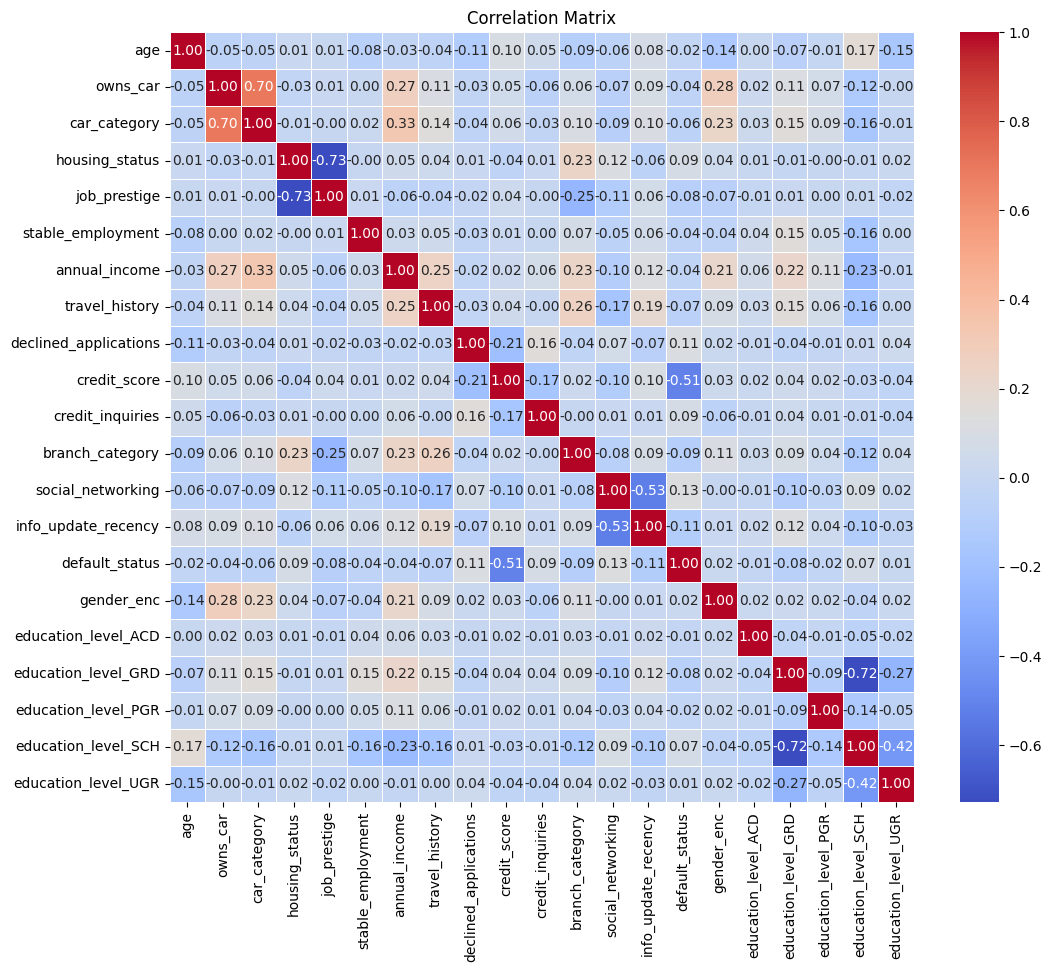

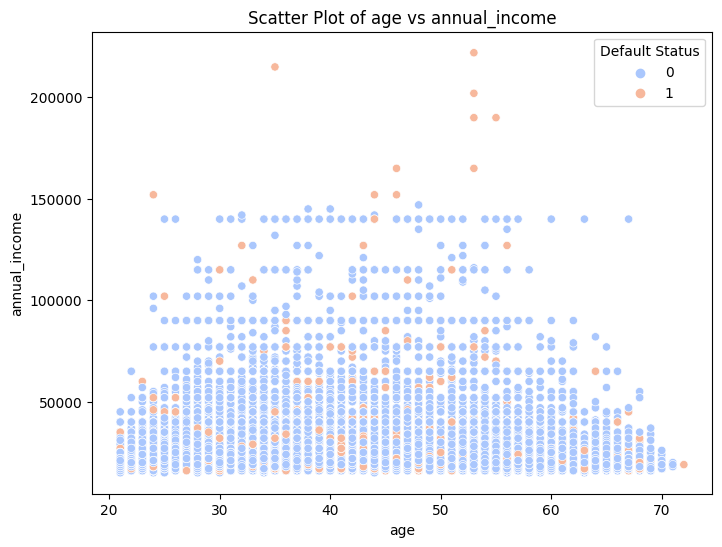

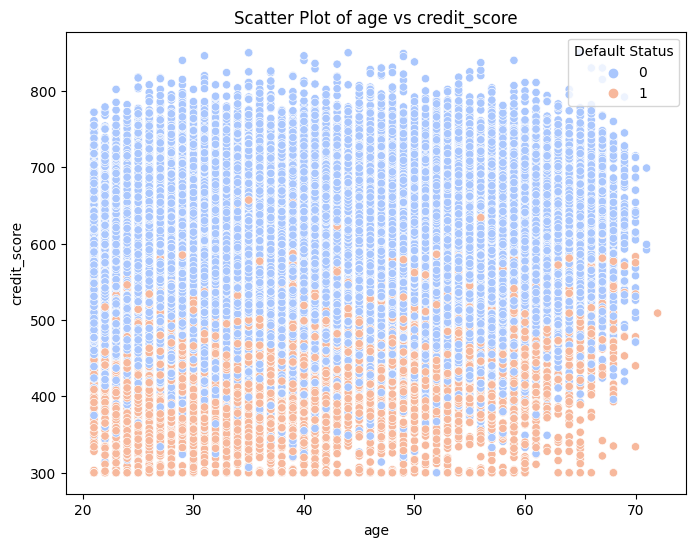

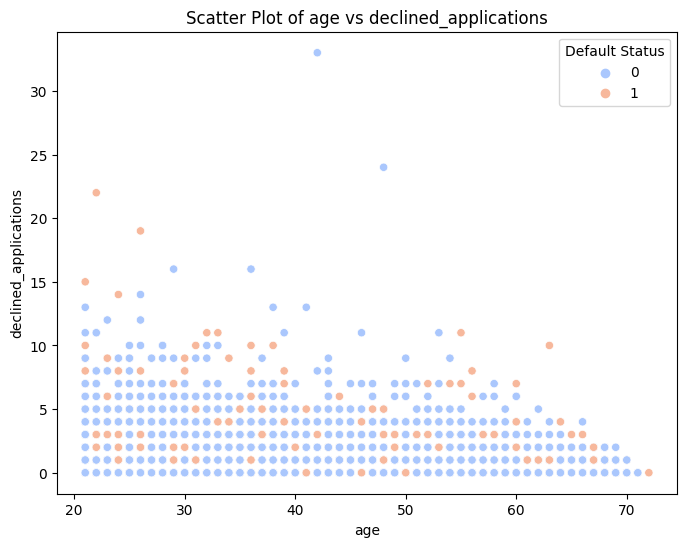

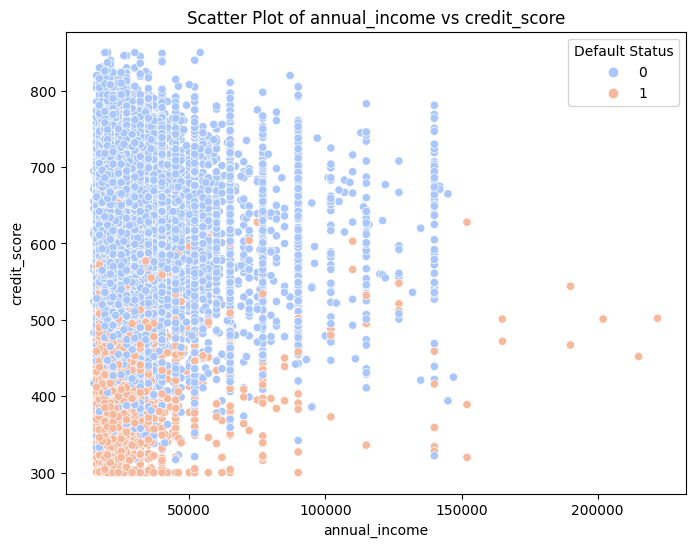

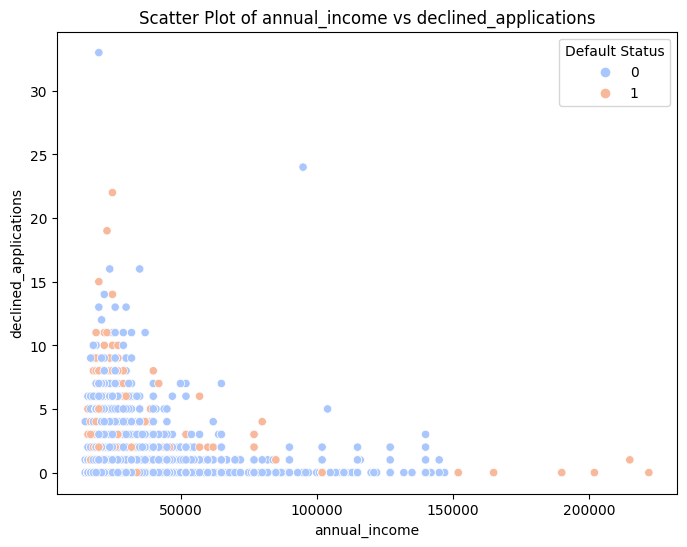

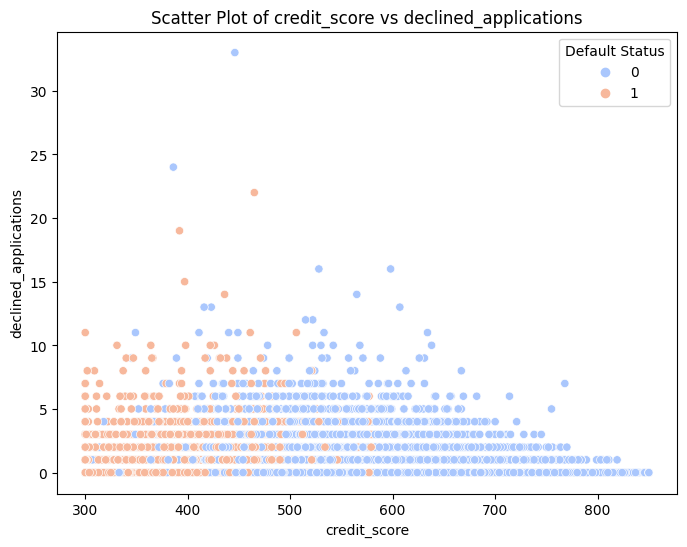

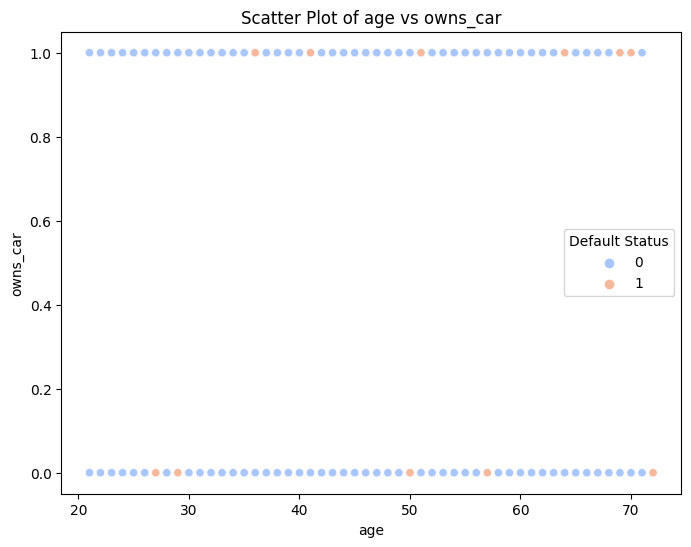

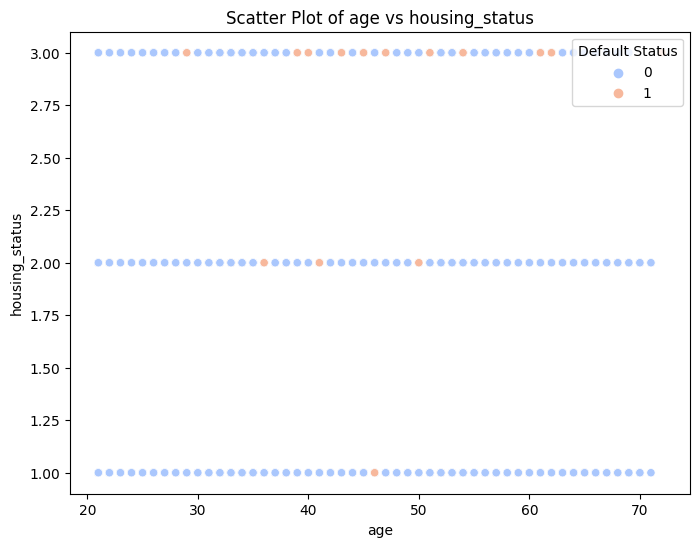

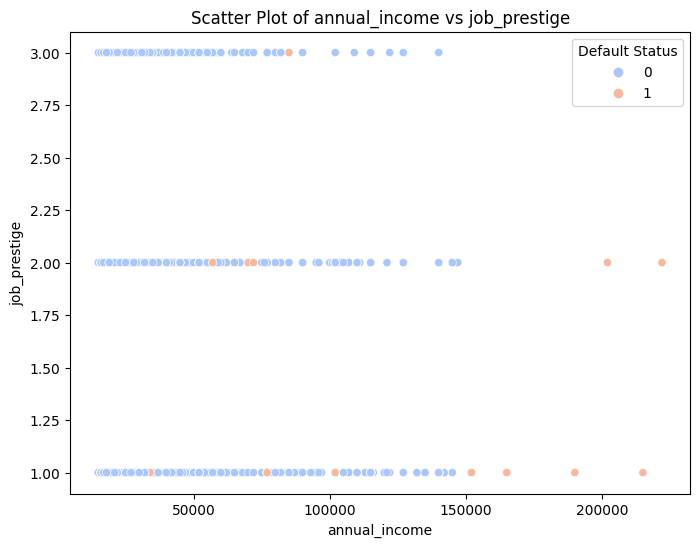

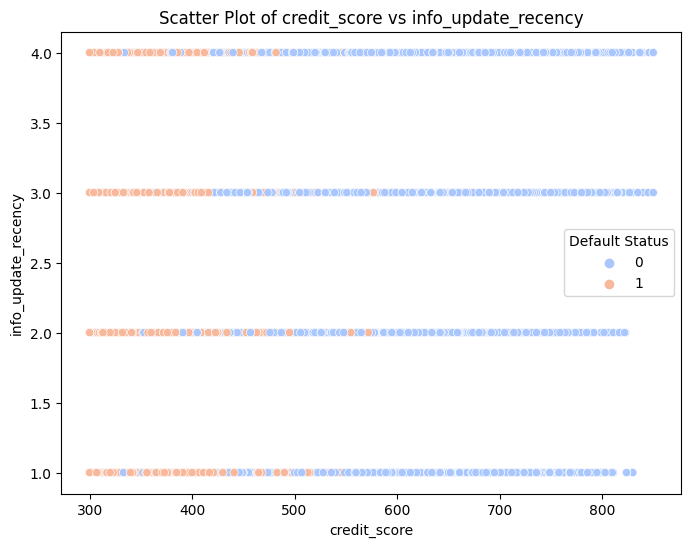

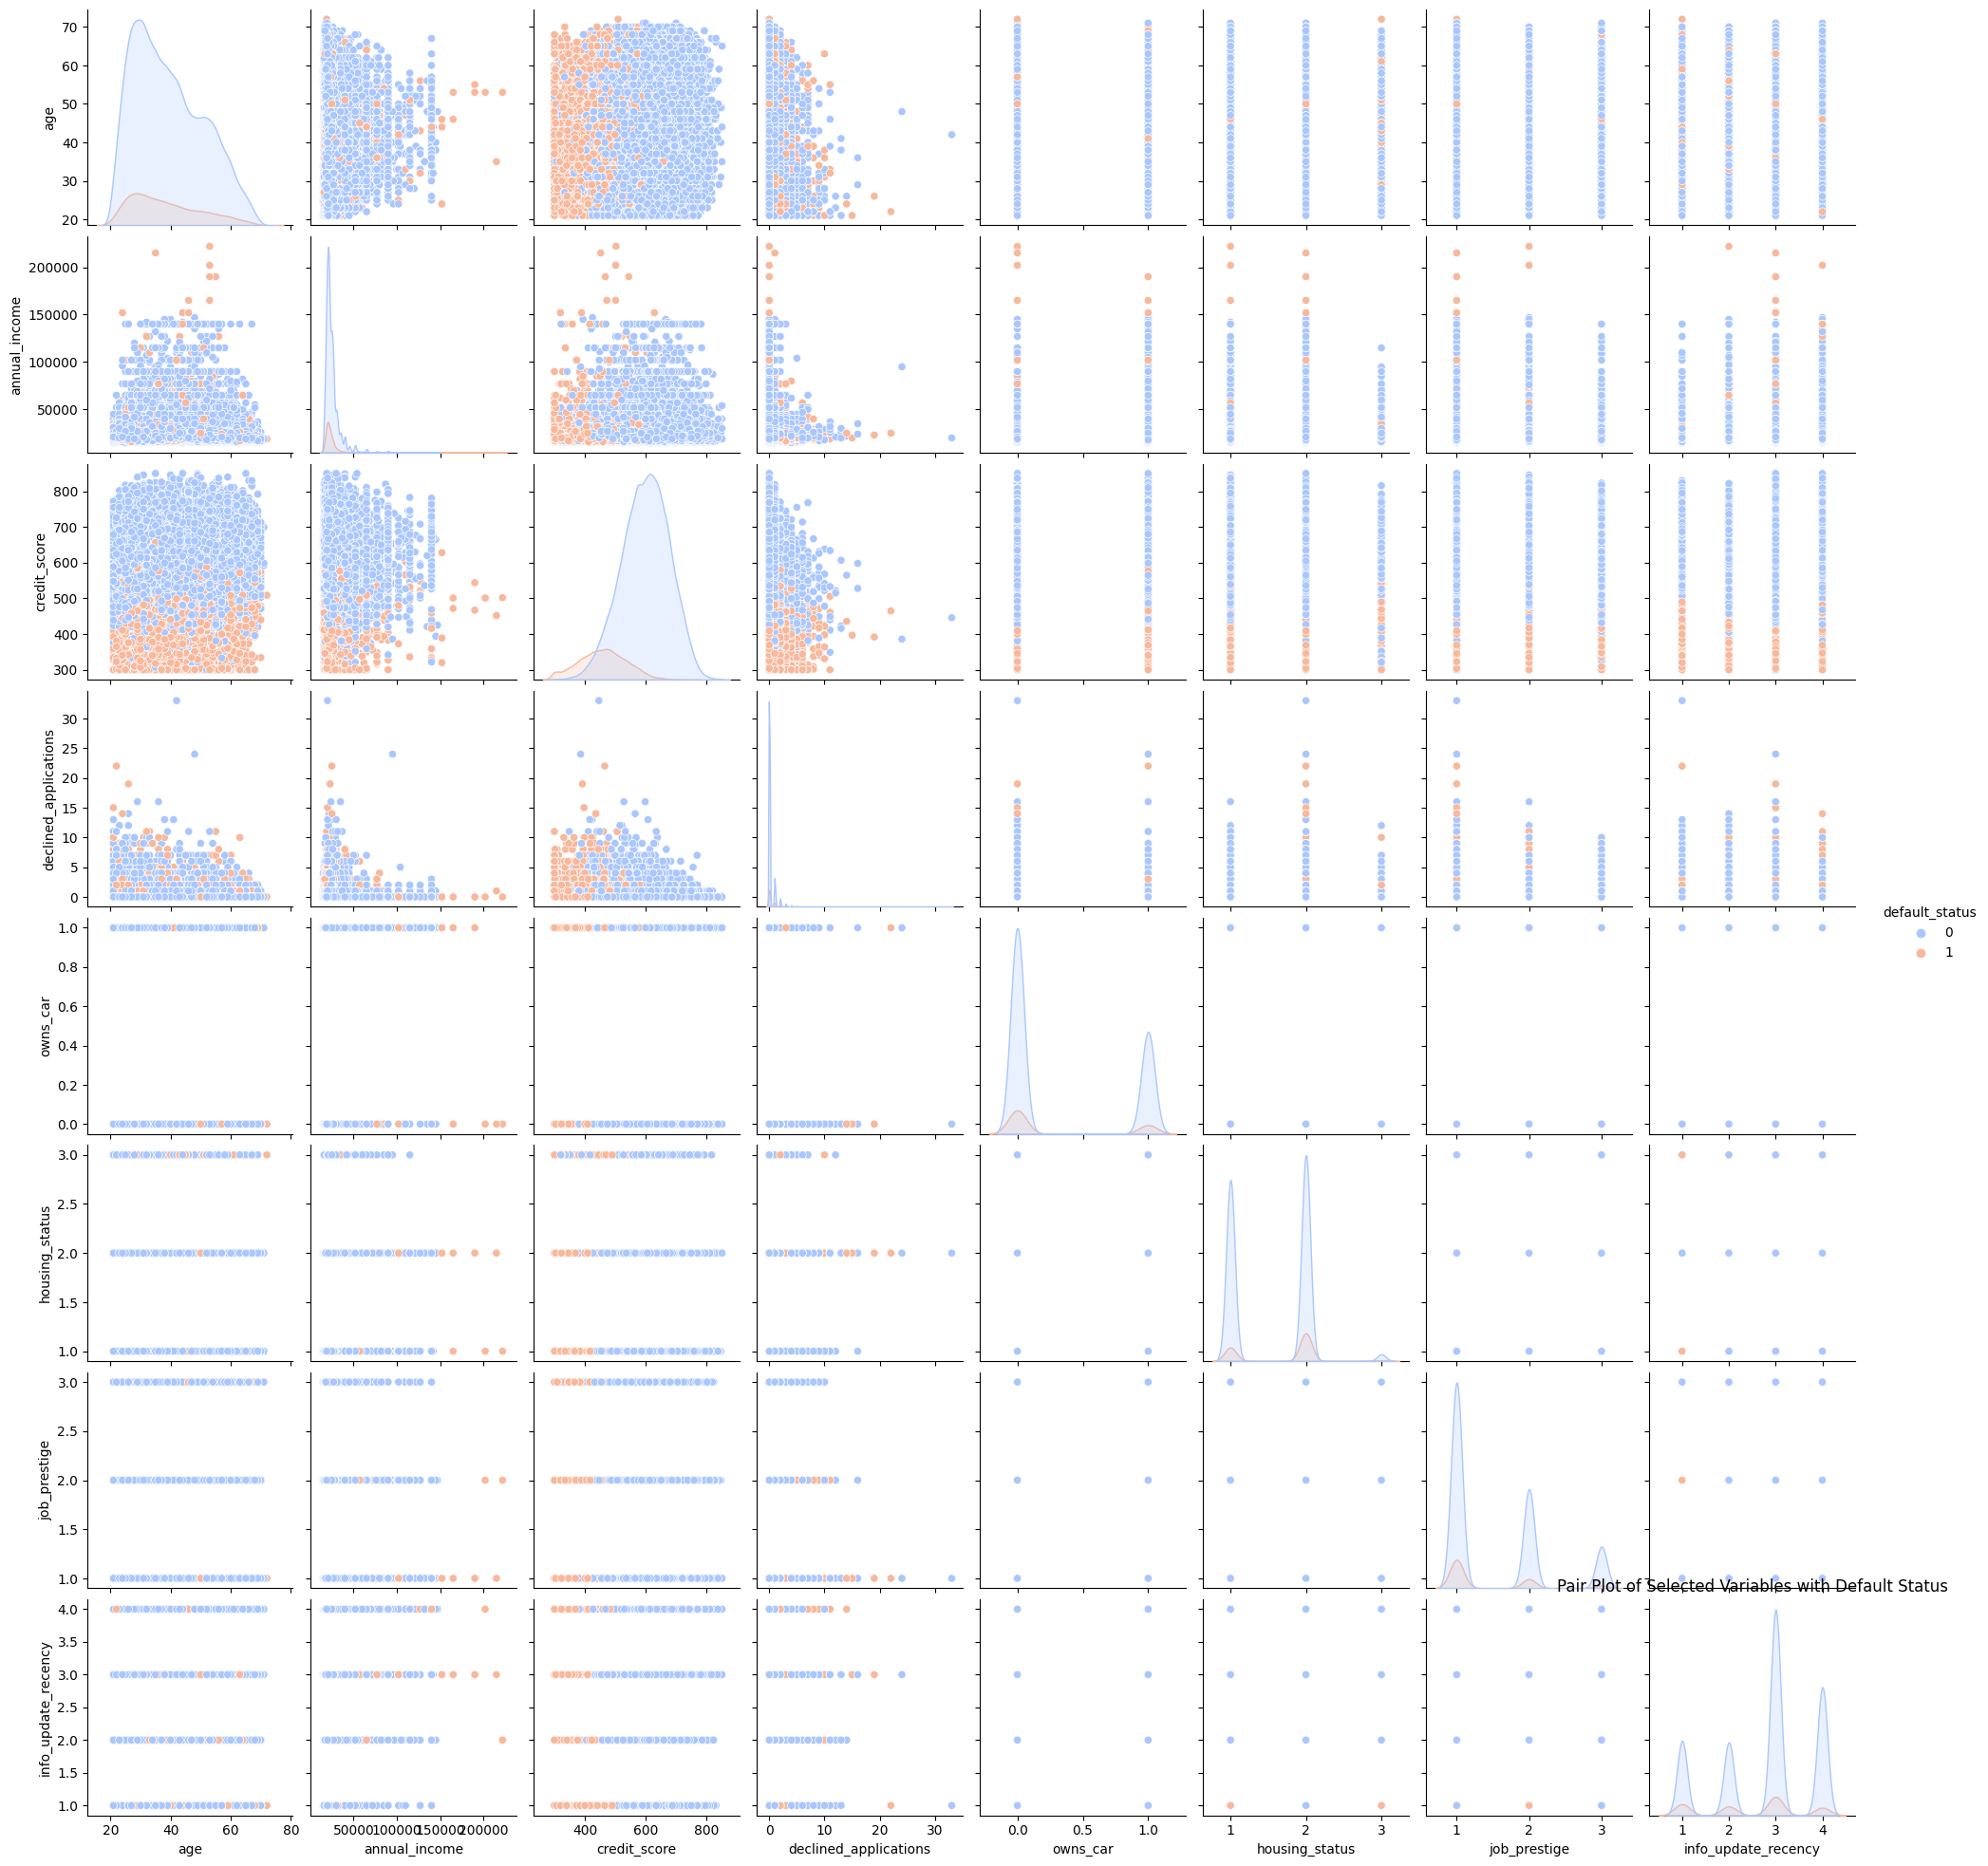

In [24]:
# Bivariate Analysis

# 1. Calculate and visualize correlations between numerical variables
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Create scatter plots to examine relationships between specific variables
# Including more columns and examining relationships with the target variable 'default_status'
variables_to_plot = [
    ('age', 'annual_income'),
    ('age', 'credit_score'),
    ('age', 'declined_applications'),
    ('annual_income', 'credit_score'),
    ('annual_income', 'declined_applications'),
    ('credit_score', 'declined_applications'),
    ('age', 'owns_car'),
    ('age', 'housing_status'),
    ('annual_income', 'job_prestige'),
    ('credit_score', 'info_update_recency')
]

for var1, var2 in variables_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_encoded, x=var1, y=var2, hue='default_status', palette='coolwarm')
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend(title='Default Status')
    plt.show()

# 3. Generate pair plots to explore pairwise relationships between multiple variables
# Replace with columns of interest including the target variable
pairplot_columns = [
    'age', 'annual_income', 'credit_score', 'declined_applications', 
    'owns_car', 'housing_status', 'job_prestige', 'info_update_recency'
]

sns.pairplot(df_encoded[pairplot_columns + ['default_status']], hue='default_status', palette='coolwarm')
plt.title('Pair Plot of Selected Variables with Default Status')
plt.show()

# Modeling

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb


X = df_encoded.drop(columns=['default_status'])
y = df_encoded['default_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Smote for imbalaced classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# -----------------------
# XGBoost
# -----------------------
xgb_model = xgb.XGBClassifier(eval_metric='logloss', scale_pos_weight=len(y_train) / (2 * sum(y_train == 1)))
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

# -----------------------
# LightGBM
# -----------------------
lgb_model = lgb.LGBMClassifier(class_weight='balanced')
lgb_model.fit(X_train_resampled, y_train_resampled)
lgb_predictions = lgb_model.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, lgb_predictions))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]))

# -----------------------
# Gradient Boosting
# -----------------------
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting ROC AUC Score:", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))

# -----------------------
# Random Forest
# -----------------------
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     19241
           1       0.39      0.79      0.52      2785

    accuracy                           0.82     22026
   macro avg       0.68      0.81      0.71     22026
weighted avg       0.89      0.82      0.84     22026

XGBoost ROC AUC Score: 0.892710555901675
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0

In [26]:
results = {
    'Model': ['XGBoost', 'LightGBM', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [0.82, 0.88, 0.88, 0.89],
    'Precision (0)': [0.96, 0.95, 0.95, 0.94],
    'Recall (0)': [0.82, 0.92, 0.91, 0.93],
    'F1 Score (0)': [0.89, 0.93, 0.93, 0.94],
    'Precision (1)': [0.39, 0.53, 0.51, 0.55],
    'Recall (1)': [0.79, 0.64, 0.66, 0.59],
    'F1 Score (1)': [0.52, 0.58, 0.58, 0.57],
    'ROC AUC': [0.8927, 0.8970, 0.8944, 0.8895]
}

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision (0),Recall (0),F1 Score (0),Precision (1),Recall (1),F1 Score (1),ROC AUC
0,XGBoost,0.82,0.96,0.82,0.89,0.39,0.79,0.52,0.8927
1,LightGBM,0.88,0.95,0.92,0.93,0.53,0.64,0.58,0.8970
2,Gradient Boosting,0.88,0.95,0.91,0.93,0.51,0.66,0.58,0.8944
3,Random Forest,0.89,0.94,0.93,0.94,0.55,0.59,0.57,0.8895


### Model Performance Summary

The following table summarizes the performance metrics for each model used in the prediction task:

| Model              | Accuracy | Precision (0) | Recall (0) | F1 Score (0) | Precision (1) | Recall (1) | F1 Score (1) | ROC AUC |
|--------------------|----------|---------------|------------|--------------|---------------|------------|--------------|---------|
| **XGBoost**        | 0.82     | 0.96          | 0.82       | 0.89         | 0.39          | 0.79       | 0.52         | 0.8927  |
| **LightGBM**       | 0.88     | 0.95          | 0.92       | 0.93         | 0.53          | 0.64       | 0.58         | 0.8970  |
| **Gradient Boosting** | 0.88  | 0.95          | 0.91       | 0.93         | 0.51          | 0.66       | 0.58         | 0.8944  |
| **Random Forest**  | 0.89     | 0.94          | 0.93       | 0.94         | 0.55          | 0.59       | 0.57         | 0.8895  |

### Model Evaluation and Implications

- **Accuracy**: Represents the overall correctness of the model. Random Forest has the highest accuracy at 0.89, indicating it performs well across the entire dataset.

- **Precision (0)**: Measures the proportion of true negatives among all predicted negatives. XGBoost has the highest precision for class 0 (0.96), meaning it is very good at correctly identifying non-defaults.

- **Recall (0)**: Indicates the model's ability to correctly identify all actual negatives. LightGBM has the highest recall for class 0 (0.92), showing it captures a large portion of the non-defaults.

- **F1 Score (0)**: Combines precision and recall for class 0 into a single metric. Random Forest leads with an F1 Score of 0.94, reflecting a good balance between precision and recall for class 0.

- **Precision (1)**: Measures the proportion of true positives among all predicted positives. Random Forest has the highest precision for class 1 (0.55), indicating it is better at correctly identifying defaults compared to other models.

- **Recall (1)**: Indicates the model's ability to correctly identify all actual positives. LightGBM has the highest recall for class 1 (0.64), showing it captures a large portion of the defaults.

- **F1 Score (1)**: Combines precision and recall for class 1 into a single metric. All models have similar F1 Scores for class 1, with LightGBM and Gradient Boosting performing slightly better.

- **ROC AUC**: Measures the model's ability to distinguish between classes. LightGBM has the highest ROC AUC (0.8970), indicating it performs the best at ranking predictions.


# Modeling with Optuna

In [29]:
import optuna
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    
    # Initialize the Random Forest model with the sampled hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight='balanced'  # Handle class imbalance
    )
    
    # Fit the model on the training data
    rf_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test set
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Compute the ROC AUC score
    score = roc_auc_score(y_test, y_pred_proba)
    
    return score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Number of trials to run

# Print the best parameters and score
print("Best parameters found: ", study.best_params)
print("Best ROC AUC score: ", study.best_value)

[I 2024-08-22 11:17:49,317] A new study created in memory with name: no-name-98f48d61-6a95-4e2e-8782-b639acf381e5
[I 2024-08-22 11:17:59,777] Trial 0 finished with value: 0.8946714717608653 and parameters: {'n_estimators': 128, 'max_depth': 35, 'min_samples_split': 19, 'min_samples_leaf': 19, 'max_features': 'auto'}. Best is trial 0 with value: 0.8946714717608653.
[I 2024-08-22 11:18:29,052] Trial 1 finished with value: 0.8950274030517382 and parameters: {'n_estimators': 351, 'max_depth': 44, 'min_samples_split': 20, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 1 with value: 0.8950274030517382.
[I 2024-08-22 11:19:10,418] Trial 2 finished with value: 0.8942423686254208 and parameters: {'n_estimators': 478, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8950274030517382.
[I 2024-08-22 11:19:50,137] Trial 3 finished with value: 0.8947903830063663 and parameters: {'n_estimators': 450, 'max_depth': 2

Best parameters found:  {'n_estimators': 112, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 13, 'max_features': 'log2'}
Best ROC AUC score:  0.8955251806039185


In [30]:
# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss', 'rf']),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 1e1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 1e1),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 1e-3, 10.0)  # Handle class imbalance
    }
    
    # Initialize the LightGBM model with the sampled hyperparameters
    model = lgb.LGBMClassifier(**param)
    
    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute the ROC AUC score
    score = roc_auc_score(y_test, y_pred_proba)
    
    return score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Number of trials to run

# Print the best parameters and score
print("Best parameters found: ", study.best_params)
print("Best ROC AUC score: ", study.best_value)

[I 2024-08-22 11:36:09,798] A new study created in memory with name: no-name-61e57952-762e-4333-a703-9ea4fc6cc571


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2024-08-22 11:36:19,856] Trial 0 finished with value: 0.8937383021388814 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 78, 'max_depth': 46, 'learning_rate': 0.021271371190892254, 'n_estimators': 859, 'subsample': 0.6308295675717936, 'colsample_bytree': 0.6246963694595093, 'min_child_samples': 48, 'reg_alpha': 0.053987263060035574, 'reg_lambda': 0.015772164338276762, 'scale_pos_weight': 0.006792759960446709}. Best is trial 0 with value: 0.8937383021388814.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:36:31,158] Trial 1 finished with value: 0.893817259056602 and parameters: {'boosting_type': 'goss', 'num_leaves': 148, 'max_depth': 19, 'learning_rate': 0.0011320779933715085, 'n_estimators': 519, 'subsample': 0.9113686833965559, 'colsample_bytree': 0.9601429228657264, 'min_child_samples': 18, 'reg_alpha': 0.262106007575852, 'reg_lambda': 0.02357477242299067, 'scale_pos_weight': 2.8862052063152137}. Best is trial 1 with value: 0.893817259056602.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2024-08-22 11:36:41,922] Trial 2 finished with value: 0.8938847951202349 and parameters: {'boosting_type': 'goss', 'num_leaves': 149, 'max_depth': 32, 'learning_rate': 0.04197068408971318, 'n_estimators': 777, 'subsample': 0.6491969498330981, 'colsample_bytree': 0.6274823838009278, 'min_child_samples': 25, 'reg_alpha': 4.835720340282717, 'reg_lambda': 0.0011612503977986798, 'scale_pos_weight': 0.07678588150807376}. Best is trial 2 with value: 0.8938847951202349.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2024-08-22 11:36:46,444] Trial 3 finished with value: 0.8754408902219855 and parameters: {'boosting_type': 'rf', 'num_leaves': 89, 'max_depth': 30, 'learning_rate': 0.002957940097073303, 'n_estimators': 572, 'subsample': 0.6719028679985724, 'colsample_bytree': 0.5183558161361586, 'min_child_samples': 21, 'reg_alpha': 0.6102056370041999, 'reg_lambda': 0.22734515752180168, 'scale_pos_weight': 0.0226844030652758}. Best is trial 2 with value: 0.8938847951202349.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:36:50,805] Trial 4 finished with value: 0.883849176798087 and parameters: {'boosting_type': 'rf', 'num_leaves': 97, 'max_depth': 44, 'learning_rate': 0.0001487651563559055, 'n_estimators': 339, 'subsample': 0.5883606933331318, 'colsample_bytree': 0.769076302161523, 'min_child_samples': 17, 'reg_alpha': 0.0022135371564956157, 'reg_lambda': 0.006457229027495683, 'scale_pos_weight': 9.608840712418449}. Best is trial 2 with value: 0.8938847951202349.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

[I 2024-08-22 11:36:59,229] Trial 5 finished with value: 0.8935117138867044 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 121, 'max_depth': 13, 'learning_rate': 0.02475345765947626, 'n_estimators': 941, 'subsample': 0.6321723714882652, 'colsample_bytree': 0.6265962634308, 'min_child_samples': 5, 'reg_alpha': 1.1987376933728484, 'reg_lambda': 0.014509214763079972, 'scale_pos_weight': 0.00727825447359265}. Best is trial 2 with value: 0.8938847951202349.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:37:04,368] Trial 6 finished with value: 0.8833952445019178 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 86, 'max_depth': 33, 'learning_rate': 0.0005683805407102356, 'n_estimators': 358, 'subsample': 0.5906289511223854, 'colsample_bytree': 0.6444329247657198, 'min_child_samples': 37, 'reg_alpha': 0.7171527102413573, 'reg_lambda': 0.007122963142183948, 'scale_pos_weight': 0.6659612212217731}. Best is trial 2 with value: 0.8938847951202349.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2024-08-22 11:38:51,127] Trial 7 finished with value: 0.8862773492832154 and parameters: {'boosting_type': 'dart', 'num_leaves': 123, 'max_depth': 29, 'learning_rate': 0.02716894245483999, 'n_estimators': 616, 'subsample': 0.5495664022409517, 'colsample_bytree': 0.623632639441269, 'min_child_samples': 34, 'reg_alpha': 0.04991611380732692, 'reg_lambda': 0.027816286840056756, 'scale_pos_weight': 0.007116754382529506}. Best is trial 2 with value: 0.8938847951202349.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with

[I 2024-08-22 11:38:59,541] Trial 8 finished with value: 0.8958197341348335 and parameters: {'boosting_type': 'goss', 'num_leaves': 57, 'max_depth': 49, 'learning_rate': 0.04910330352872618, 'n_estimators': 600, 'subsample': 0.9184409184310225, 'colsample_bytree': 0.5247112850521467, 'min_child_samples': 32, 'reg_alpha': 1.3644841922973137, 'reg_lambda': 3.021158508543548, 'scale_pos_weight': 1.0135193909903737}. Best is trial 8 with value: 0.8958197341348335.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2024-08-22 11:39:04,416] Trial 9 finished with value: 0.8944188880025701 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 114, 'max_depth': 9, 'learning_rate': 0.08543807085046269, 'n_estimators': 410, 'subsample': 0.9563346607159587, 'colsample_bytree': 0.5759823749049804, 'min_child_samples': 20, 'reg_alpha': 1.1010446935729328, 'reg_lambda': 0.0020600025470880077, 'scale_pos_weight': 0.409633762996039}. Best is trial 8 with value: 0.8958197341348335.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped tra

[I 2024-08-22 11:39:06,924] Trial 10 finished with value: 0.5 and parameters: {'boosting_type': 'goss', 'num_leaves': 38, 'max_depth': 49, 'learning_rate': 0.006108110861157977, 'n_estimators': 728, 'subsample': 0.8277769660373158, 'colsample_bytree': 0.7726930712555662, 'min_child_samples': 49, 'reg_alpha': 8.62156186988867, 'reg_lambda': 6.613077219432828, 'scale_pos_weight': 0.001037851774766139}. Best is trial 8 with value: 0.8958197341348335.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2024-08-22 11:40:01,912] Trial 11 finished with value: 0.895785247634255 and parameters: {'boosting_type': 'dart', 'num_leaves': 46, 'max_depth': 7, 'learning_rate': 0.09933226422424299, 'n_estimators': 474, 'subsample': 0.9974771197383483, 'colsample_bytree': 0.5286009058352794, 'min_child_samples': 33, 'reg_alpha': 2.4026957056069858, 'reg_lambda': 1.1886085113116371, 'scale_pos_weight': 0.4909299263368779}. Best is trial 8 with value: 0.8958197341348335.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2024-08-22 11:40:46,454] Trial 12 finished with value: 0.8956027379071678 and parameters: {'boosting_type': 'dart', 'num_leaves': 41, 'max_depth': 5, 'learning_rate': 0.09671467080991987, 'n_estimators': 487, 'subsample': 0.9878534852587593, 'colsample_bytree': 0.5034827930780859, 'min_child_samples': 35, 'reg_alpha': 3.3118637885109603, 'reg_lambda': 2.152901712477718, 'scale_pos_weight': 0.7149715441799107}. Best is trial 8 with value: 0.8958197341348335.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:42:49,195] Trial 13 finished with value: 0.8945101148738243 and parameters: {'boosting_type': 'dart', 'num_leaves': 59, 'max_depth': 20, 'learning_rate': 0.00737186548317433, 'n_estimators': 688, 'subsample': 0.8661324830477787, 'colsample_bytree': 0.8637843181528821, 'min_child_samples': 42, 'reg_alpha': 0.14658819925608865, 'reg_lambda': 0.5068986736214629, 'scale_pos_weight': 0.18577188715416632}. Best is trial 8 with value: 0.8958197341348335.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:43:33,640] Trial 14 finished with value: 0.8962419138440253 and parameters: {'boosting_type': 'dart', 'num_leaves': 21, 'max_depth': 38, 'learning_rate': 0.010611269090441409, 'n_estimators': 469, 'subsample': 0.7397193496038647, 'colsample_bytree': 0.711771779431913, 'min_child_samples': 29, 'reg_alpha': 0.014506673760036943, 'reg_lambda': 1.289792749330506, 'scale_pos_weight': 2.865465359036642}. Best is trial 14 with value: 0.8962419138440253.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:43:40,897] Trial 15 finished with value: 0.8997042428006398 and parameters: {'boosting_type': 'goss', 'num_leaves': 21, 'max_depth': 39, 'learning_rate': 0.009920159843092519, 'n_estimators': 605, 'subsample': 0.757758487267024, 'colsample_bytree': 0.8575624949685587, 'min_child_samples': 28, 'reg_alpha': 0.01166834178602192, 'reg_lambda': 8.567281767958722, 'scale_pos_weight': 2.5822966643732355}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:44:17,915] Trial 16 finished with value: 0.8973019725139977 and parameters: {'boosting_type': 'dart', 'num_leaves': 22, 'max_depth': 39, 'learning_rate': 0.010856549745675036, 'n_estimators': 430, 'subsample': 0.7461901495777411, 'colsample_bytree': 0.8443499523446705, 'min_child_samples': 27, 'reg_alpha': 0.009438459744254881, 'reg_lambda': 6.3870318865257, 'scale_pos_weight': 8.147097167811127}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:44:22,015] Trial 17 finished with value: 0.8920103101200432 and parameters: {'boosting_type': 'goss', 'num_leaves': 26, 'max_depth': 40, 'learning_rate': 0.0024367141260417356, 'n_estimators': 305, 'subsample': 0.7627330848097181, 'colsample_bytree': 0.873334201803154, 'min_child_samples': 7, 'reg_alpha': 0.005541360166638472, 'reg_lambda': 7.894351866132413, 'scale_pos_weight': 7.06575315304076}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:44:31,123] Trial 18 finished with value: 0.8905503442725023 and parameters: {'boosting_type': 'rf', 'num_leaves': 65, 'max_depth': 40, 'learning_rate': 0.011796822303488292, 'n_estimators': 779, 'subsample': 0.7556474408175736, 'colsample_bytree': 0.8518118133889998, 'min_child_samples': 13, 'reg_alpha': 0.0012476271737403635, 'reg_lambda': 0.08748773929872801, 'scale_pos_weight': 2.603859481040887}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:45:13,071] Trial 19 finished with value: 0.8929778915965002 and parameters: {'boosting_type': 'dart', 'num_leaves': 31, 'max_depth': 23, 'learning_rate': 0.0015187896393058893, 'n_estimators': 403, 'subsample': 0.8070961094766336, 'colsample_bytree': 0.9759803007533332, 'min_child_samples': 27, 'reg_alpha': 0.013573064811931062, 'reg_lambda': 0.4385440914610957, 'scale_pos_weight': 1.6889250379576712}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Usi

[I 2024-08-22 11:45:19,686] Trial 20 finished with value: 0.890623012255864 and parameters: {'boosting_type': 'goss', 'num_leaves': 20, 'max_depth': 36, 'learning_rate': 0.0005750176307553914, 'n_estimators': 563, 'subsample': 0.704395872116039, 'colsample_bytree': 0.9167519249700724, 'min_child_samples': 40, 'reg_alpha': 0.014328535612931525, 'reg_lambda': 8.751781662572029, 'scale_pos_weight': 5.573333657610851}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:45:56,059] Trial 21 finished with value: 0.8995261931783349 and parameters: {'boosting_type': 'dart', 'num_leaves': 20, 'max_depth': 40, 'learning_rate': 0.010498890387521881, 'n_estimators': 437, 'subsample': 0.7330469209229336, 'colsample_bytree': 0.8021963221207715, 'min_child_samples': 28, 'reg_alpha': 0.014641991803329047, 'reg_lambda': 2.68228843001266, 'scale_pos_weight': 3.657692703398144}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:46:45,031] Trial 22 finished with value: 0.8890669022248925 and parameters: {'boosting_type': 'dart', 'num_leaves': 49, 'max_depth': 44, 'learning_rate': 0.005174741461209393, 'n_estimators': 422, 'subsample': 0.7103626756859189, 'colsample_bytree': 0.8120208565806051, 'min_child_samples': 23, 'reg_alpha': 0.005229750020348582, 'reg_lambda': 2.941567264426765, 'scale_pos_weight': 9.773929370842826}. Best is trial 15 with value: 0.8997042428006398.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:47:49,767] Trial 23 finished with value: 0.9005842830572842 and parameters: {'boosting_type': 'dart', 'num_leaves': 33, 'max_depth': 35, 'learning_rate': 0.014010904381835205, 'n_estimators': 533, 'subsample': 0.7946708411366042, 'colsample_bytree': 0.8254521885942236, 'min_child_samples': 30, 'reg_alpha': 0.032247512444932944, 'reg_lambda': 4.828625816026516, 'scale_pos_weight': 3.5605401119289346}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:49:37,277] Trial 24 finished with value: 0.8967231106301 and parameters: {'boosting_type': 'dart', 'num_leaves': 34, 'max_depth': 35, 'learning_rate': 0.01625101250368323, 'n_estimators': 673, 'subsample': 0.8117653638302929, 'colsample_bytree': 0.6918818933040642, 'min_child_samples': 30, 'reg_alpha': 0.05697881170375563, 'reg_lambda': 0.7994602125142356, 'scale_pos_weight': 0.17116759986960697}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:50:56,709] Trial 25 finished with value: 0.894312200056787 and parameters: {'boosting_type': 'dart', 'num_leaves': 68, 'max_depth': 42, 'learning_rate': 0.005244977406647177, 'n_estimators': 532, 'subsample': 0.7856829330289277, 'colsample_bytree': 0.813261080336011, 'min_child_samples': 39, 'reg_alpha': 0.0331405875044326, 'reg_lambda': 3.470944890558777, 'scale_pos_weight': 3.4569626776276277}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:51:03,122] Trial 26 finished with value: 0.896922835615187 and parameters: {'boosting_type': 'goss', 'num_leaves': 51, 'max_depth': 26, 'learning_rate': 0.04812992776968252, 'n_estimators': 542, 'subsample': 0.8518200531930469, 'colsample_bytree': 0.9214950715565983, 'min_child_samples': 12, 'reg_alpha': 0.13628781900819859, 'reg_lambda': 0.19771078206568451, 'scale_pos_weight': 1.3893435453231298}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:51:08,933] Trial 27 finished with value: 0.8945810100121888 and parameters: {'boosting_type': 'rf', 'num_leaves': 33, 'max_depth': 35, 'learning_rate': 0.003766285227595355, 'n_estimators': 643, 'subsample': 0.7193086194633113, 'colsample_bytree': 0.9081244618258455, 'min_child_samples': 44, 'reg_alpha': 0.027605306537787196, 'reg_lambda': 1.7180818397558608, 'scale_pos_weight': 0.2275108447836537}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2024-08-22 11:53:08,505] Trial 28 finished with value: 0.8974126446956431 and parameters: {'boosting_type': 'dart', 'num_leaves': 42, 'max_depth': 46, 'learning_rate': 0.013876783943525428, 'n_estimators': 731, 'subsample': 0.6816480049693694, 'colsample_bytree': 0.7341653784227854, 'min_child_samples': 25, 'reg_alpha': 0.00446346380451245, 'reg_lambda': 4.733740210793047, 'scale_pos_weight': 0.05268393610122587}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:53:17,972] Trial 29 finished with value: 0.897823851427378 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 72, 'max_depth': 27, 'learning_rate': 0.021898507515514344, 'n_estimators': 855, 'subsample': 0.8909775249947046, 'colsample_bytree': 0.8184429613890941, 'min_child_samples': 45, 'reg_alpha': 0.024233190831024667, 'reg_lambda': 0.06883633432683353, 'scale_pos_weight': 1.564502820896669}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:53:25,914] Trial 30 finished with value: 0.8998799224091059 and parameters: {'boosting_type': 'goss', 'num_leaves': 30, 'max_depth': 46, 'learning_rate': 0.008025552965385754, 'n_estimators': 600, 'subsample': 0.7870844185314707, 'colsample_bytree': 0.7734397257389873, 'min_child_samples': 30, 'reg_alpha': 0.07749266195176722, 'reg_lambda': 0.7441269077027509, 'scale_pos_weight': 4.7486741290726595}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:53:34,621] Trial 31 finished with value: 0.9005274213866876 and parameters: {'boosting_type': 'goss', 'num_leaves': 29, 'max_depth': 45, 'learning_rate': 0.006794456050366701, 'n_estimators': 636, 'subsample': 0.7852862993714899, 'colsample_bytree': 0.791008637317572, 'min_child_samples': 29, 'reg_alpha': 0.07137615367245816, 'reg_lambda': 0.6787085717576623, 'scale_pos_weight': 4.294639846632184}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the t

[I 2024-08-22 11:53:44,152] Trial 32 finished with value: 0.897287752430967 and parameters: {'boosting_type': 'goss', 'num_leaves': 31, 'max_depth': 50, 'learning_rate': 0.0018257469704710415, 'n_estimators': 628, 'subsample': 0.7870901224973457, 'colsample_bytree': 0.7607889128994424, 'min_child_samples': 31, 'reg_alpha': 0.24686425810444762, 'reg_lambda': 0.7323981968634733, 'scale_pos_weight': 2.1669622800555732}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:53:52,793] Trial 33 finished with value: 0.8998258599674523 and parameters: {'boosting_type': 'goss', 'num_leaves': 53, 'max_depth': 46, 'learning_rate': 0.00751940191576695, 'n_estimators': 587, 'subsample': 0.842699288427881, 'colsample_bytree': 0.8849732800217968, 'min_child_samples': 24, 'reg_alpha': 0.07754040367072507, 'reg_lambda': 0.24549528784472568, 'scale_pos_weight': 4.348124247243632}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:54:00,814] Trial 34 finished with value: 0.9005839751421005 and parameters: {'boosting_type': 'goss', 'num_leaves': 57, 'max_depth': 47, 'learning_rate': 0.003429029239013008, 'n_estimators': 514, 'subsample': 0.8379033008483932, 'colsample_bytree': 0.9457127615516521, 'min_child_samples': 25, 'reg_alpha': 0.08370609033536114, 'reg_lambda': 0.21982876163620016, 'scale_pos_weight': 4.811907155894678}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:54:09,518] Trial 35 finished with value: 0.900139840147232 and parameters: {'boosting_type': 'goss', 'num_leaves': 75, 'max_depth': 47, 'learning_rate': 0.0038638469253046213, 'n_estimators': 509, 'subsample': 0.8772093703419651, 'colsample_bytree': 0.9482653042167392, 'min_child_samples': 17, 'reg_alpha': 0.370925445882151, 'reg_lambda': 0.1410569078860245, 'scale_pos_weight': 5.491811678461633}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:54:18,736] Trial 36 finished with value: 0.8964468920487622 and parameters: {'boosting_type': 'goss', 'num_leaves': 80, 'max_depth': 43, 'learning_rate': 0.0009321734410243662, 'n_estimators': 498, 'subsample': 0.8938516949378303, 'colsample_bytree': 0.9513669666027574, 'min_child_samples': 17, 'reg_alpha': 0.2656130475267375, 'reg_lambda': 0.04401162068991542, 'scale_pos_weight': 0.9411364743115287}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:54:27,069] Trial 37 finished with value: 0.897783981076466 and parameters: {'boosting_type': 'goss', 'num_leaves': 94, 'max_depth': 47, 'learning_rate': 0.003981026907222694, 'n_estimators': 520, 'subsample': 0.928984783223959, 'colsample_bytree': 0.9969150494862408, 'min_child_samples': 14, 'reg_alpha': 0.3597451813601636, 'reg_lambda': 0.16460632561472383, 'scale_pos_weight': 0.029714450483021286}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:54:33,624] Trial 38 finished with value: 0.8965830092214999 and parameters: {'boosting_type': 'goss', 'num_leaves': 77, 'max_depth': 31, 'learning_rate': 0.0023152871775026264, 'n_estimators': 365, 'subsample': 0.8728603893257169, 'colsample_bytree': 0.9464993723883306, 'min_child_samples': 21, 'reg_alpha': 0.15167447462398215, 'reg_lambda': 0.41132812082076176, 'scale_pos_weight': 5.764565494213503}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-08-22 11:54:40,548] Trial 39 finished with value: 0.8851611474114083 and parameters: {'boosting_type': 'rf', 'num_leaves': 108, 'max_depth': 42, 'learning_rate': 0.0010586543384778395, 'n_estimators': 552, 'subsample': 0.8249372216628819, 'colsample_bytree': 0.9868315392409817, 'min_child_samples': 22, 'reg_alpha': 0.40132556644640094, 'reg_lambda': 0.11044752890554974, 'scale_pos_weight': 0.3122788487820937}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:54:52,370] Trial 40 finished with value: 0.8939265409545388 and parameters: {'boosting_type': 'goss', 'num_leaves': 58, 'max_depth': 48, 'learning_rate': 0.00011848305629605305, 'n_estimators': 696, 'subsample': 0.9445205993783231, 'colsample_bytree': 0.9382902095840087, 'min_child_samples': 19, 'reg_alpha': 0.04153086257746084, 'reg_lambda': 0.04582659557185101, 'scale_pos_weight': 1.1715041491007743}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:55:01,059] Trial 41 finished with value: 0.893912498156008 and parameters: {'boosting_type': 'goss', 'num_leaves': 44, 'max_depth': 45, 'learning_rate': 0.0029830681217217977, 'n_estimators': 571, 'subsample': 0.780883622928735, 'colsample_bytree': 0.6923556219636232, 'min_child_samples': 36, 'reg_alpha': 0.09182806894506261, 'reg_lambda': 0.3406457424159103, 'scale_pos_weight': 4.786924285656786}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:55:18,543] Trial 42 finished with value: 0.8888969237127069 and parameters: {'boosting_type': 'goss', 'num_leaves': 136, 'max_depth': 50, 'learning_rate': 0.031703882411229976, 'n_estimators': 992, 'subsample': 0.8043136361562523, 'colsample_bytree': 0.7814682409643907, 'min_child_samples': 32, 'reg_alpha': 0.07507900494012167, 'reg_lambda': 0.1459136382826391, 'scale_pos_weight': 9.384439099083652}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:55:25,964] Trial 43 finished with value: 0.8979496114530264 and parameters: {'boosting_type': 'goss', 'num_leaves': 37, 'max_depth': 47, 'learning_rate': 0.004107563493755826, 'n_estimators': 512, 'subsample': 0.5079284463626919, 'colsample_bytree': 0.7364876253410133, 'min_child_samples': 16, 'reg_alpha': 0.6998416193850675, 'reg_lambda': 0.7416688397615533, 'scale_pos_weight': 5.1930976390453445}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[I 2024-08-22 11:55:31,973] Trial 44 finished with value: 0.8973359831456559 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 64, 'max_depth': 43, 'learning_rate': 0.019892596440407816, 'n_estimators': 659, 'subsample': 0.8379580451549435, 'colsample_bytree': 0.8881890015700313, 'min_child_samples': 26, 'reg_alpha': 0.19621763406062792, 'reg_lambda': 0.01780942686896311, 'scale_pos_weight': 0.0013330392656884368}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:55:39,720] Trial 45 finished with value: 0.8997838528717802 and parameters: {'boosting_type': 'goss', 'num_leaves': 27, 'max_depth': 45, 'learning_rate': 0.008570200160307052, 'n_estimators': 616, 'subsample': 0.8862573369697807, 'colsample_bytree': 0.8351201743865945, 'min_child_samples': 9, 'reg_alpha': 0.058615819192648515, 'reg_lambda': 0.2600867554666995, 'scale_pos_weight': 2.0740220958691262}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:55:48,693] Trial 46 finished with value: 0.8915107223998125 and parameters: {'boosting_type': 'goss', 'num_leaves': 78, 'max_depth': 33, 'learning_rate': 0.00026036299284607633, 'n_estimators': 448, 'subsample': 0.8571357117978939, 'colsample_bytree': 0.788374540631686, 'min_child_samples': 34, 'reg_alpha': 0.11466210836799164, 'reg_lambda': 1.2426568846550274, 'scale_pos_weight': 0.5818684347104562}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as 

[I 2024-08-22 11:56:00,921] Trial 47 finished with value: 0.8982012994580602 and parameters: {'boosting_type': 'goss', 'num_leaves': 92, 'max_depth': 17, 'learning_rate': 0.006395125391523499, 'n_estimators': 718, 'subsample': 0.6596485315380336, 'colsample_bytree': 0.7567459876916356, 'min_child_samples': 31, 'reg_alpha': 0.022190176913508164, 'reg_lambda': 0.5583890396815211, 'scale_pos_weight': 3.3175589727198895}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2024-08-22 11:56:04,869] Trial 48 finished with value: 0.8930815283827352 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 85, 'max_depth': 48, 'learning_rate': 0.004776489401039478, 'n_estimators': 469, 'subsample': 0.9079639375197227, 'colsample_bytree': 0.6717080658311492, 'min_child_samples': 38, 'reg_alpha': 0.35994208529369104, 'reg_lambda': 0.3134596381991289, 'scale_pos_weight': 0.010917664987432312}. Best is trial 23 with value: 0.9005842830572842.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. F

[I 2024-08-22 11:56:17,888] Trial 49 finished with value: 0.897911150047349 and parameters: {'boosting_type': 'goss', 'num_leaves': 101, 'max_depth': 42, 'learning_rate': 0.01658786596227708, 'n_estimators': 769, 'subsample': 0.7846344137824335, 'colsample_bytree': 0.9713935105509861, 'min_child_samples': 24, 'reg_alpha': 0.041495697167597025, 'reg_lambda': 1.753247287395443, 'scale_pos_weight': 0.8470112912940221}. Best is trial 23 with value: 0.9005842830572842.


Best parameters found:  {'boosting_type': 'dart', 'num_leaves': 33, 'max_depth': 35, 'learning_rate': 0.014010904381835205, 'n_estimators': 533, 'subsample': 0.7946708411366042, 'colsample_bytree': 0.8254521885942236, 'min_child_samples': 30, 'reg_alpha': 0.032247512444932944, 'reg_lambda': 4.828625816026516, 'scale_pos_weight': 3.5605401119289346}
Best ROC AUC score:  0.9005842830572842


In [32]:
best_params = study.best_params

# Initialize the LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)

# Fit the model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled, eval_set=[(X_test, y_test)])

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Optionally, you can save the model for future use
import joblib
joblib.dump(best_model, 'best_lightgbm_model.pkl')

[LightGBM] [Info] Number of positive: 44842, number of negative: 44842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 89684, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     19241
           1       0.35      0.86      0.50      2785

    accuracy                           0.78     22026
   macro avg       0.66      0.82      0.68     22026
weighted avg       0.90      0.78      0.82     22026

ROC AUC Score: 0.9005842830572842


['best_lightgbm_model.pkl']

# Model Evaluation

- **Class 0**: 
  - **Precision**: 0.97 (97% of predicted class 0 instances are actual class 0)
  - **Recall**: 0.77 (77% of actual class 0 instances were correctly predicted)
  - **F1-Score**: 0.86 (The balance between precision and recall is quite good for class 0)
  - **Support**: 19,241 (The number of actual instances of class 0 in the test set)

- **Class 1**: 
  - **Precision**: 0.35 (35% of predicted class 1 instances are actual class 1)
  - **Recall**: 0.86 (86% of actual class 1 instances were correctly predicted)
  - **F1-Score**: 0.50 (The balance between precision and recall is lower for class 1)
  - **Support**: 2,785 (The number of actual instances of class 1 in the test set)

- **Accuracy**: 0.78 (The proportion of correctly predicted instances out of the total instances)

- **Macro Average**: 
  - **Precision**: 0.66 (Average precision across all classes)
  - **Recall**: 0.82 (Average recall across all classes)
  - **F1-Score**: 0.68 (Average F1-Score across all classes)

- **Weighted Average**: 
  - **Precision**: 0.90 (Weighted average precision considering the support of each class)
  - **Recall**: 0.78 (Weighted average recall considering the support of each class)
  - **F1-Score**: 0.82 (Weighted average F1-Score considering the support of each class)

### ROC AUC Score

- **ROC AUC Score**: 0.9006

  The ROC AUC score measures the model's ability to distinguish between the positive and negative classes. A score of 0.9006 indicates that the model has a high capability in separating the classes, with a value closer to 1 signifying better performance.

### Conclusion

The model shows good performance in distinguishing between classes, particularly for class 0 with high precision and an acceptable recall. However, class 1 has a lower precision, indicating that many of the predicted positive instances are not actual positives, though the recall is high. The overall accuracy of 0.78 and the ROC AUC score of 0.9006 suggest that the model is effective but may benefit from further optimization to improve precision for class 1.
